**Statistical Practical Implementation**

Measure Of Central Tendency 

1.Mean

2.Median

3.Mode

In [1]:
import numpy as np
import pandas as pd

In [10]:
df =pd.read_csv('http://bit.ly/drinksbycountry')

In [11]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [12]:
np.mean(df['spirit_servings'])

80.99481865284974

In [13]:
np.median(df['spirit_servings'])

56.0

In [15]:
import statistics

In [16]:
statistics.mean(df['spirit_servings'])

80.99481865284974

In [17]:
statistics.median(df['spirit_servings'])

56

In [22]:
statistics.mode(df['spirit_servings'])

0

In [23]:
df[df.spirit_servings==0]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
2,Algeria,25,0,14,0.7,Africa
13,Bangladesh,0,0,0,0.0,Asia
19,Bhutan,23,0,0,0.4,Asia
27,Burundi,88,0,0,6.3,Africa
46,North Korea,0,0,0,0.0,Asia
55,Equatorial Guinea,92,0,233,5.8,Africa
56,Eritrea,18,0,0,0.5,Africa
63,Gambia,8,0,1,2.4,Africa
70,Guinea,9,0,2,0.2,Africa


<Axes: >

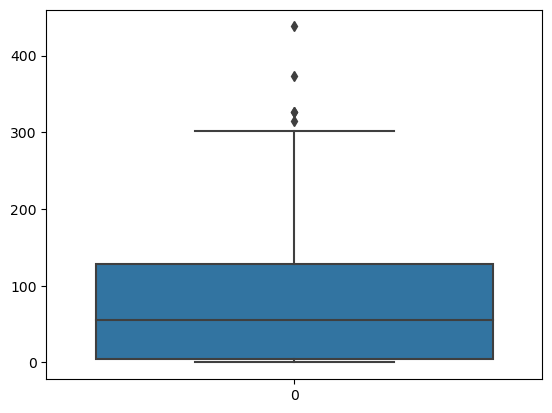

In [24]:
import seaborn as sns
sns.boxplot(df['spirit_servings'])

In [30]:
df['spirit_servings'].min()

0

In [31]:
df['spirit_servings'].max()

438

5 Number Summary

In [32]:
q1,q3=np.percentile(df['spirit_servings'],[25,75])

In [33]:
print(q1,q3)

4.0 128.0


In [34]:
IQR=q3-q1

In [35]:
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

-182.0 314.0


In [36]:
df_filtered = df[(df['spirit_servings'] >= lower_fence) & (df['spirit_servings'] <= higher_fence)]

In [37]:
df_filtered 

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


<Axes: >

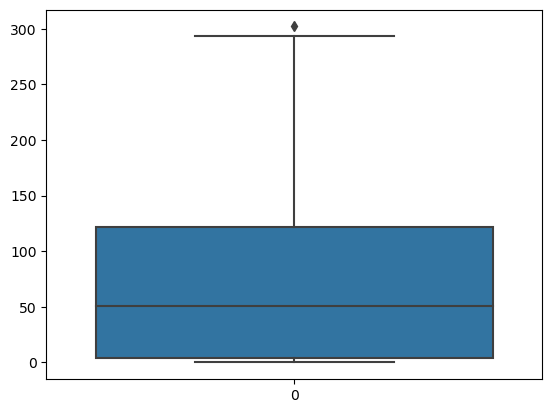

In [38]:
sns.boxplot(df_filtered['spirit_servings'])

In [46]:
df_filtered.sort_values('spirit_servings',ascending=True)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
27,Burundi,88,0,0,6.3,Africa
128,Pakistan,0,0,0,0.0,Asia
118,Nauru,49,0,8,1.0,Oceania
46,North Korea,0,0,0,0.0,Asia
...,...,...,...,...,...,...
40,Cook Islands,0,254,74,5.9,Oceania
169,Thailand,99,258,1,6.4,Asia
50,Dominica,52,286,26,6.6,North America
155,Slovakia,196,293,116,11.4,Europe


**Measure of Dispersion**

In [49]:
 np.var(df_filtered['spirit_servings'])    ##population variance  here it use n

5845.266523313718

In [51]:
statistics.variance(df_filtered['spirit_servings'])    ##sample variance in this it caluclate by divide the deviation by(n-1)

5876.5246330640575

In [55]:
def variance(data):
    n=len(data)
    mean=sum(data)/n
    ##variance
    deviation=[(x-mean)**2 for x in data]
    variance=sum(deviation)/(n-1)
    return variance

In [56]:
variance(df_filtered['spirit_servings'])

5876.524633064058

In [57]:
def variance(data,dof=0):
    n=len(data)
    mean=sum(data)/n
    ##variance
    deviation=[(x-mean)**2 for x in data]
    variance=sum(deviation)/(n-dof)
    return variance

In [58]:
variance(df_filtered['spirit_servings'],dof=1)   ##sample variance

5876.524633064058

In [60]:
variance(df_filtered['spirit_servings'],dof=0)   #population variance

5845.266523313718

In [62]:
statistics.pvariance(df_filtered['spirit_servings'])   ##populationvariance

5845.266523313717

**Histograms and pdf**

C:\Users\dell\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='spirit_servings', ylabel='Count'>

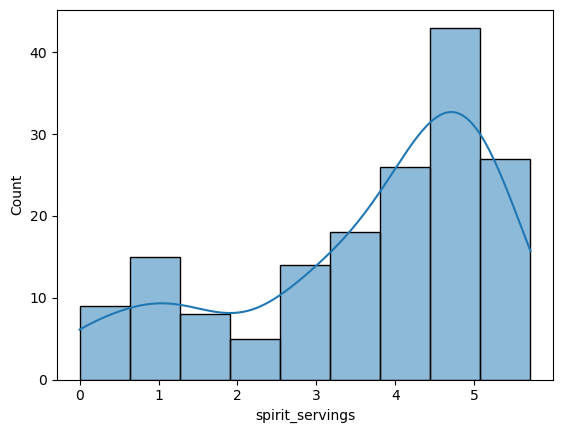

In [92]:
sns.histplot(np.log(df_filtered['spirit_servings']),kde=True)

In [74]:
## create a normal distributed data 
s=np.random.normal(0.5,0.2,500)

In [75]:
s

array([ 0.34507611,  0.79287558,  0.65464712,  0.58752762,  0.50269261,
        0.44275106,  0.67500956,  0.31351634,  0.72386891,  0.48686638,
        0.51485684,  0.37643214,  0.30201737,  0.34733944,  0.52925058,
        0.52986228,  0.38443499,  0.29597652,  0.02892797,  0.32896871,
        0.29070249,  0.46169172,  0.25777263,  0.61064672,  0.90205016,
        0.48521385,  0.41055204,  0.80221329,  0.45660705,  0.24447338,
        0.64141194,  0.47595233,  0.53671107,  0.77372632,  0.37729503,
        0.31861594,  0.56770085,  0.39202527,  0.38398645,  0.15560863,
        0.12193229,  0.41062521,  0.36972573,  0.38708937,  0.5673267 ,
        0.48310405,  0.24060353,  0.4409121 ,  0.14504693,  0.53968571,
        0.65120036,  0.51190928,  0.46184034,  0.30673393,  0.56969128,
        0.53578062,  0.38254213,  0.63877091,  0.21762351,  0.47856468,
        0.18715291,  0.31080548,  0.28885751,  0.41708934,  0.45017053,
        0.3509172 ,  0.41657015,  0.30448433,  0.48597892,  0.69

<Axes: ylabel='Count'>

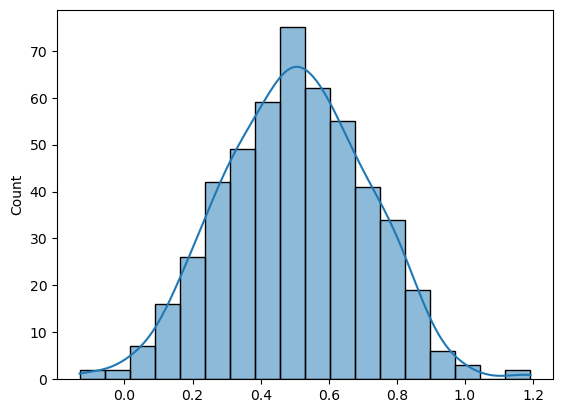

In [76]:
sns.histplot(s,kde=True)

Other DIstribution 

Log Normal Distribution, Power Law Distribution


In [79]:
mu,sigma=3.,1.   ##mean and standard deviation
s_log=np.random.lognormal(mu,sigma,100)

<Axes: ylabel='Count'>

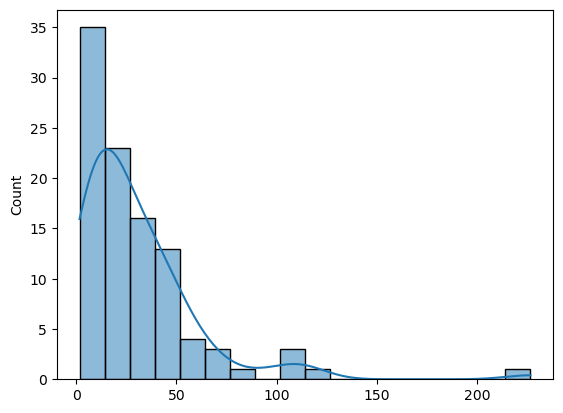

In [91]:
sns.histplot(s_log,kde=True)

<Axes: ylabel='Count'>

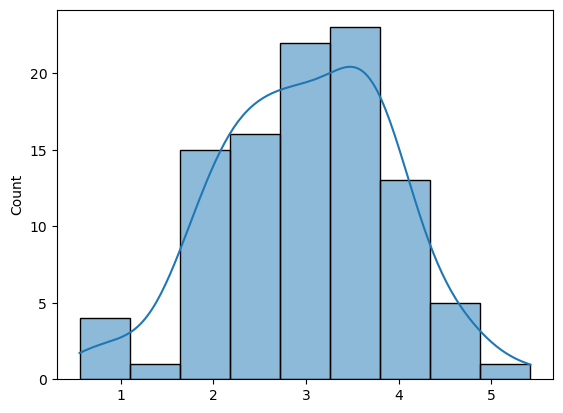

In [82]:
sns.histplot(np.log(s_log),kde=True)

**Check  whether Distribution is Normal Distribution**

In [83]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()

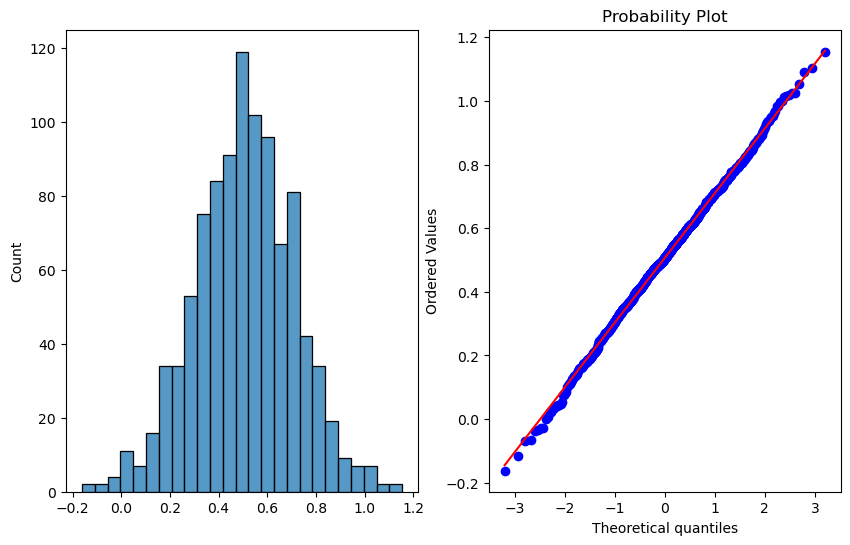

In [85]:
## create a normal distributed data 
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

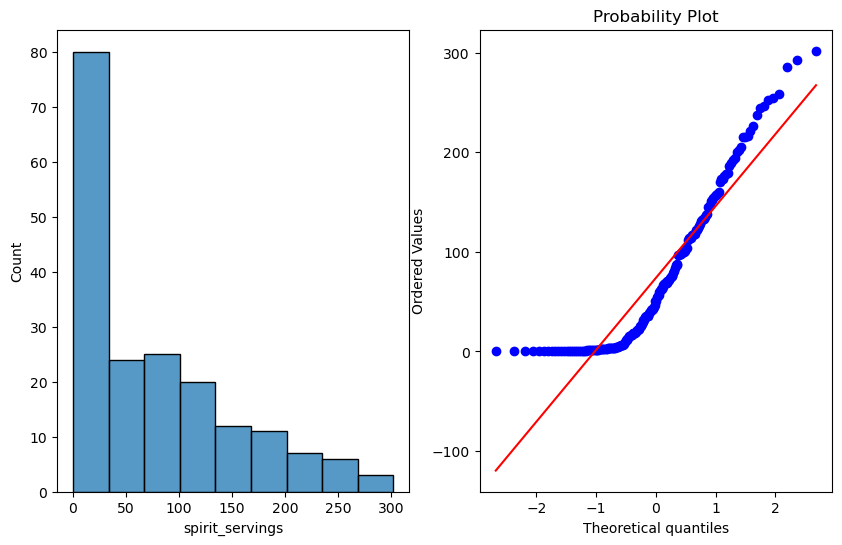

In [86]:
plot_data(df_filtered['spirit_servings'])

In [87]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dell\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


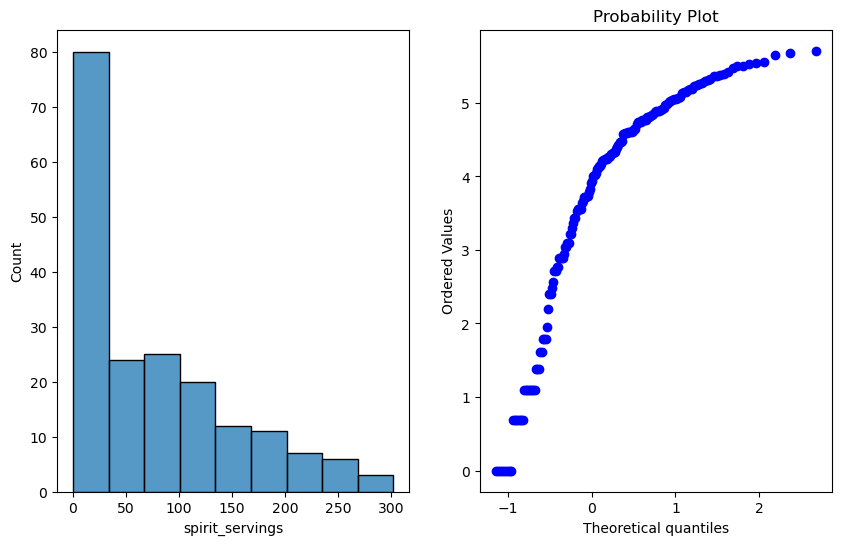

In [89]:
plot_data_log(df_filtered['spirit_servings'])